# Impact of biases on labor productivity estimation considering only daytime
In Figure 7, we examine the impact of sWBGT/ESI biases on the estimation of annual average labor productivity. We found that sWBGT vastly underestimates labor productivity in tropics and other hot-humid areas, and ESI does a much better job. 

Figure 7 is derived assuming that all 24 hours in the day are available for working, but people tend to work during daytime particularly for agriculture labor. Here we repeat the analysis in Figure 7 but only considering daytime hours.

In [16]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import regionmask
import cartopy.crs as ccrs
import cmaps
from matplotlib import gridspec

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import warnings
warnings.filterwarnings("ignore")

### Read in data:

In [18]:
# read in annual average labor productivity and biases
labor_daytime=xr.open_dataset('/scratch/brown/kong97/paper_data/earthfuture_kong_huber_2021/climatological_mean_annual_labor_daytime.nc')
# read in time series of annual avearage labor productivity
labor_daytime_ts=xr.open_dataset('/scratch/brown/kong97/paper_data/earthfuture_kong_huber_2021/annual_daytime_labor_time_series.nc')

# Reproduce Figure 7

In [19]:
# create land mask
mask = regionmask.defined_regions.natural_earth.land_110.mask(labor_daytime,lon_name="longitude",lat_name="latitude")
# create meshgrid of latitude and longitude
LON,LAT=np.meshgrid(labor_daytime.longitude,labor_daytime.latitude) 

# function to plot the map of annual labor productivity
def annual_labor_map(data,axis,norm,cmap,landmask):
    g=axis.pcolormesh(LON, LAT,data.where(landmask==0),transform=ccrs.PlateCarree(),cmap=cmap,norm=norm,rasterized=True)
    axis.coastlines(linewidth=0.5)
    axis.set_title('')
    axis.set_extent([-169.999,189.999,-60,70])
    return g
def bias_map(data,pvalue,axis,norm,cmap,landmask):
    g=axis.pcolormesh(LON, LAT,data.where(landmask==0),transform=ccrs.PlateCarree(),cmap=cmap,norm=norm,rasterized=True)
    pvalue.where(landmask==0).plot.contourf(ax=axis,transform=ccrs.PlateCarree(),
                         colors='none',levels=[0,5,1000],hatches=[None,'///'],add_colorbar=False,alpha=0,rasterized=True)
    axis.coastlines(linewidth=0.5)
    axis.set_title('')
    axis.set_extent([-169.999,189.999,-60,70])
    return g

# function to plot the zonal average curve of annual labor productivity    
def zonal_mean(data,axis,landmask):
    axis.plot(data.latitude.values,data.wbgt.where(landmask==0).mean('longitude').values,label='WBGT')
    axis.plot(data.latitude.values,data.swbgt.where(landmask==0).mean('longitude').values,label='sWBGT')
    axis.plot(data.latitude.values,data.esi.where(landmask==0).mean('longitude').values,label='ESI')
    axis.set_ylabel('Labor capacity (%)',fontsize=12)
    axis.set_xlabel('Latitudes',fontsize=12)
    axis.set_ylim(45, 100)
    axis.tick_params(axis='both', which='major', labelsize=12)

# function to plot the time series of population weighted annual average labor productivity
def annual_labor_series(data1,data2,data3,axis,ylabel):
    axis.plot(data1.year,data1,label='WBGT')
    axis.plot(data2.year,data2,label='sWBGT')
    axis.plot(data3.year,data3,label='ESI')
    axis.set_ylim(55, 100)
    axis.set_xlabel('Year',fontsize=14)
    if ylabel:
        axis.set_ylabel('Labor capacity (%)',fontsize=14)
        axis.set_yticks([60,70,80,90,100])
    else:
        axis.set_yticks([])
        axis.set_ylabel('')
    axis.tick_params(axis='both', which='major', labelsize=12)
    
# make the whole plot    
def plot(labor,ts):  
    # set the colorbar scale
    levels1 = [50,55,60,65,70,75,80,85,90,95,100.01]
    norm1=mpl.colors.BoundaryNorm(levels1,ncolors=len(levels1),extend='min')
    # choose colormap
    color=np.array([[215,48,39],
              [244,109,67],
              [253,174,97],
              [254,224,144],
              [255,255,191],
              [69,117,180],
              [116,173,209],
              [171,217,233],
              [224,243,248],
              [255,247,251],
              [255,255,255]])
    cmap1=mpl.colors.ListedColormap(color/255.)
    
    # create a figure
    fig = plt.figure(figsize=[13, 11])
    # use gridspec to customize the layout of subplots
    gs_top = gridspec.GridSpec(ncols=3, nrows=5,hspace=-0.4,wspace=0.1,width_ratios=[1,1,1],height_ratios=[3,1.35,0.7,0.95,1.8])
    gs_base = gridspec.GridSpec(ncols=3, nrows=5,hspace=-0.8,wspace=0.1,width_ratios=[1,1,1],height_ratios=[3,1.4,0.7,0.9,0.3])
    ax1 = fig.add_subplot(gs_top[0], projection=ccrs.Robinson(central_longitude=10))
    ax2 = fig.add_subplot(gs_top[1], projection=ccrs.Robinson(central_longitude=10))
    ax3 = fig.add_subplot(gs_top[2], projection=ccrs.Robinson(central_longitude=10)) 
    ax4 = fig.add_subplot(gs_top[6]) 
    ax5 = fig.add_subplot(gs_top[4:11], projection=ccrs.Robinson(central_longitude=10)) 
    ax6 = fig.add_subplot(gs_top[5:12], projection=ccrs.Robinson(central_longitude=10))
    ax7 = fig.add_subplot(gs_base[12])
    ax8 = fig.add_subplot(gs_base[13])
    ax9 = fig.add_subplot(gs_base[14])
    
    # add annotates
    fig.subplots_adjust(bottom=0, left=0,right=1, top=1,hspace=0.3)
    anno_opts = dict(xy=(0, 1.1), xycoords='axes fraction',va='center', ha='center')
    num=['a','b','c','d','e','f','g','h','i']
    i=0
    for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]:
        ax.annotate(num[i], **anno_opts,fontsize=16)
        i+=1
    
    # plot annual average labor productivity
    g=annual_labor_map(labor.wbgt,ax1,norm1,cmap1,mask)
    annual_labor_map(labor.swbgt,ax2,norm1,cmap1,mask)
    annual_labor_map(labor.esi,ax3,norm1,cmap1,mask)
    
    # plot colorbar
    cb1=fig.colorbar(g,ax=(ax1,ax2,ax3),orientation='horizontal', pad=0.06,shrink=0.3,aspect=30,
                     ticks=[50,60,70,80,90,100.01])
    cb1.set_ticklabels(['50','60','70','80','90','100'])
    cb1.set_label(label="labor capacity (%)", size=14)
    cb1.ax.tick_params(labelsize=12)
    
    # set the colorbar scale
    levels2=[-35., -30., -25., -20., -15., -10.,  -5., -2. ,  2.,   5.,  10., 15.,  20.,  25.,  30.,  35.]
    norm2=mpl.colors.BoundaryNorm(levels2,ncolors=len(levels2)+1,extend='both')
    # choose colormap
    color=np.array([[8,29,88],
              [2,56,88],
              [4,90,141],
              [5,112,176],
              [54,144,192],
              [116,169,207],
              [166,189,219],
              [236,231,242],
              [255,255,255],
              [255,247,188],
              [254,196,79],
              [254,153,41],
              [236,112,20],
              [204,76,2],
              [153,52,4],
              [102,37,6],
              [223,101,176]])
    cmap2=mpl.colors.ListedColormap(color/255.)
    
    # plot the anomaly of annual labor productivity
    h=bias_map(labor.swbgt-labor.wbgt,labor.swbgt_pvalue,ax5,norm2,cmap2,mask)
    bias_map(labor.esi-labor.wbgt,labor.esi_pvalue,ax6,norm2,cmap2,mask)

    # plot colorbar
    cb2=fig.colorbar(h,ax=(ax5,ax6),orientation='horizontal', pad=0.06,shrink=0.6,aspect=30,spacing='proportional',
                    ticks=[-30., -20., -10., -2. ,  2.,  10.,  20.,  30.]) 
    cb2.set_label(label="labor capacity difference (%)", size=14)
    cb2.ax.tick_params(labelsize=12)
    
    # plot zonal average annual labor productivity
    zonal_mean(labor,ax4,mask)
    # plot time series of population weighted annual labor productivity
    annual_labor_series(ts.globe_wbgt,ts.globe_swbgt,ts.globe_esi,ax7,True)
    annual_labor_series(ts.tropic_wbgt,ts.tropic_swbgt,ts.tropic_esi,ax8,False)
    annual_labor_series(ts.highlat_wbgt,ts.highlat_swbgt,ts.highlat_esi,ax9,False)
    ax9.legend()

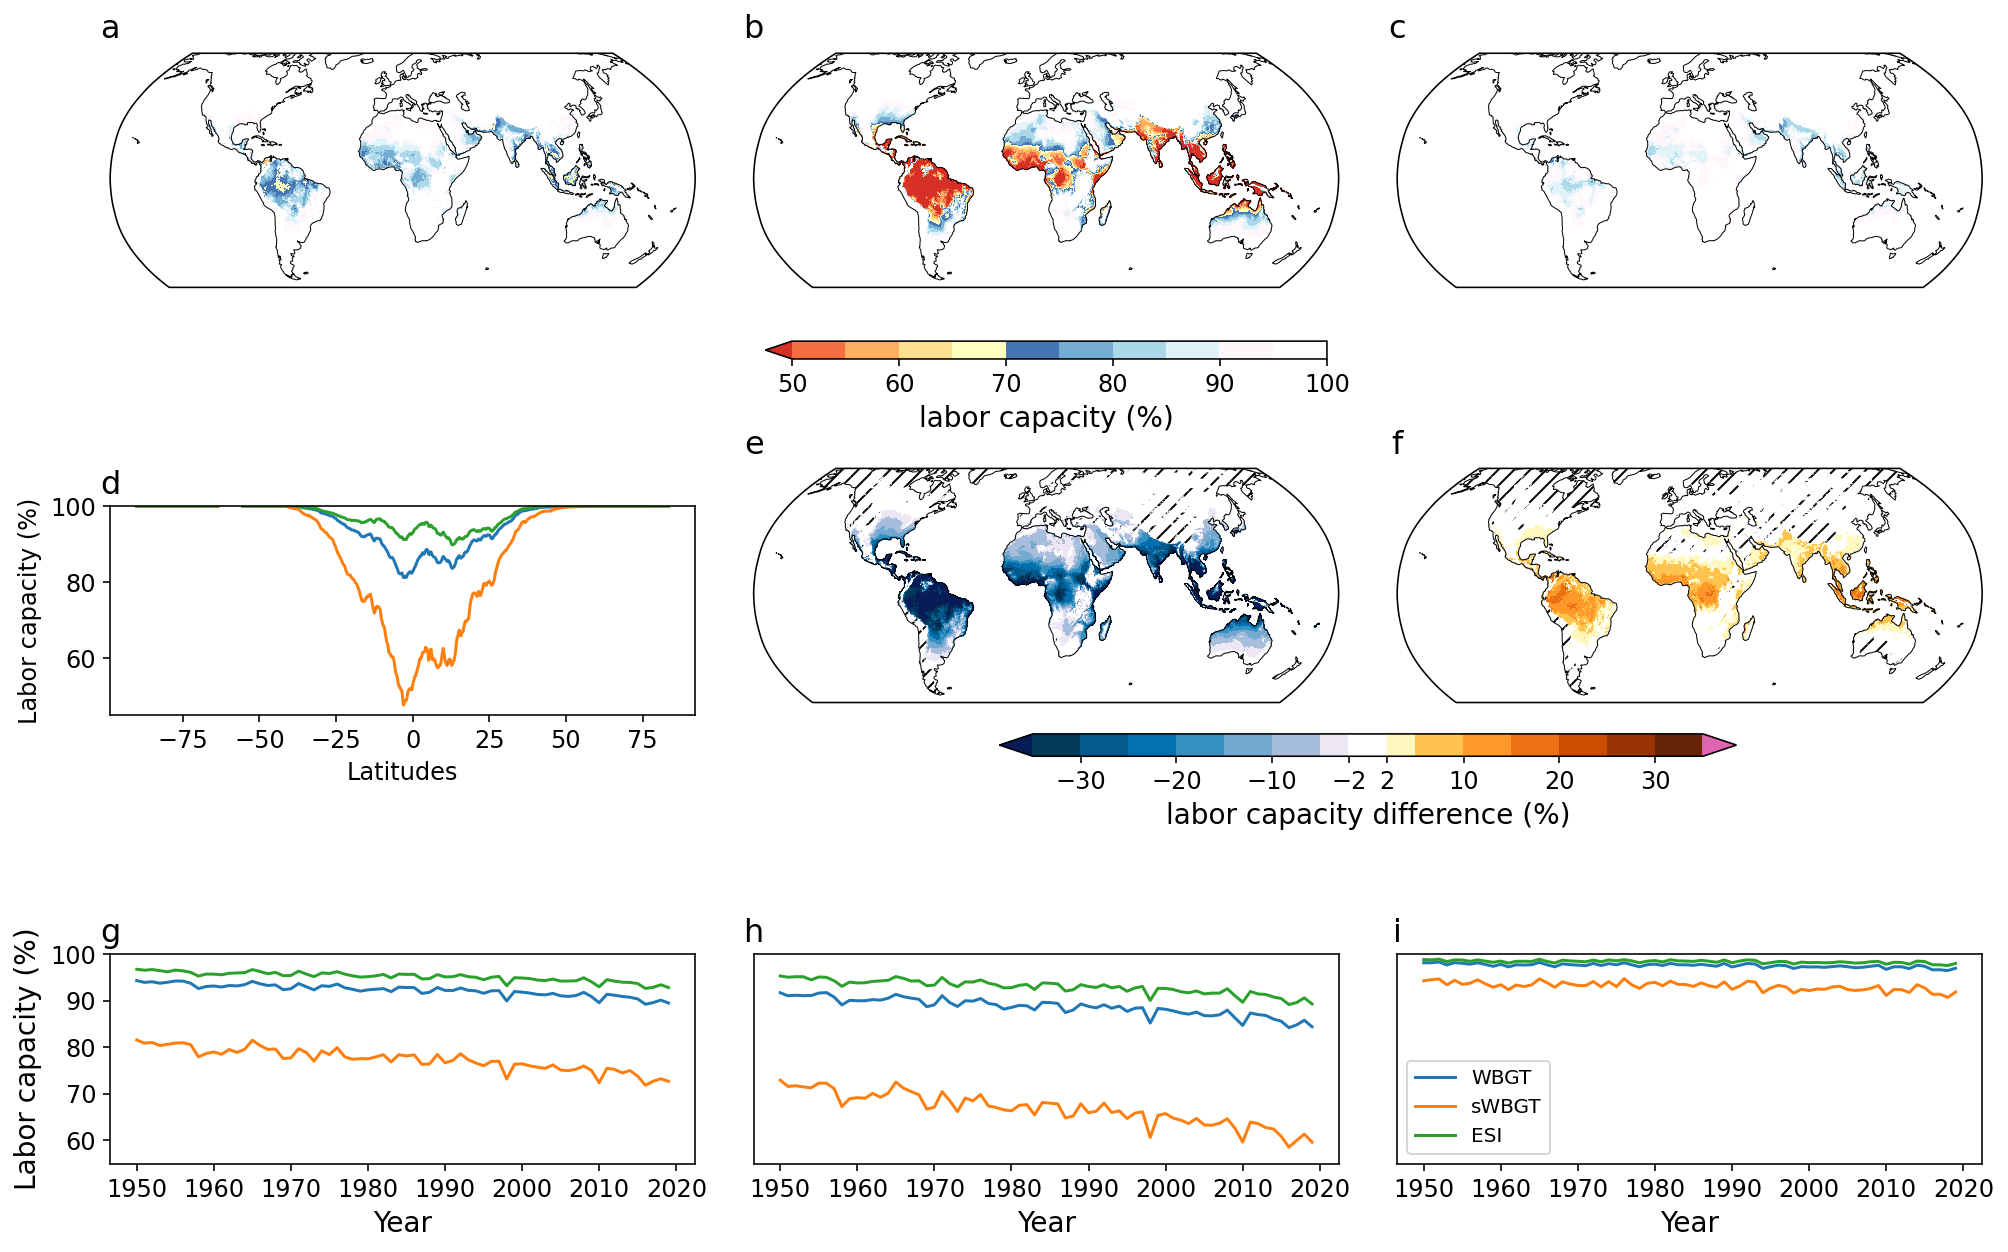

In [20]:
plot(labor_daytime*100,labor_daytime_ts*100)
plt.savefig("/scratch/brown/kong97/paper_data/earthfuture_kong_huber_2021/figures_Robinson/Figure7.pdf", bbox_inches='tight',dpi=400)

# Figure caption:
Annual average labor productivity for the period 1990-2019 derived from (a) WBGT, (b) sWBGT, and (c) ESI, with the zonal average value shown in (d). Labor productivity anomaly introduced by using (e) sWBGT and (f) ESI. Population weighted annual average labor productivity from 1950 to 2019 across the (g) globe, (h) low latitudes (30$^\circ$S -30$^\circ$N) and (i) high latitudes (outside of 30${^\circ}$S to 30${^\circ}$N). Labor productivity is quantified during daytime only assuming a metabolic rate of 415W. Areas with biases not statistically significant at 5% level are hatched in e-f. Data during the whole year are included for analysis.